In [1]:
import numpy as np
import scipy as sp
import  matplotlib.pyplot as plt
import torch 
import torchvision

In [2]:
def random_walk():
    a = np.random.randint(0,2, size = (2,5))
    x = 2*np.cumsum(2*a[0]-1)
    y = 2*np.cumsum(2*a[1]-1)    
    return([x,y])

In [3]:
a = random_walk()

(-8.795727933213875,
 -1.2576555930993025,
 0.8334606712316481,
 7.253569880529756)

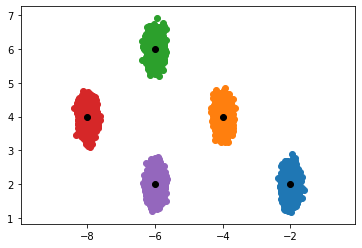

In [4]:
for i in range(5):
    mean = [a[0][i],a[1][i]]
    cov = [[0.01,0],[0,0.05]]
    x, y = np.random.multivariate_normal(mean, cov, 5000).T
    plt.scatter(x,y)
    plt.scatter(mean[0],mean[1],color = 'black')
plt.axis('equal')

In [5]:
k =0
p1 = 1/3
p2 = 1/3
p3 = 1/3
N = 1000
cov = [[0.01,0],[0,0.05]]
lr = 0.01
P1 = []
P2 = []
P3 = []
Y = []
for i in range(N):
    if int(i/200)!=int((i-1)/200):
        k+=1
    x1, x2 = np.random.multivariate_normal([a[0][k], a[1][k]],cov, 1).T
    y = 2*(k+1)
    d1 = lr*(y-(p1*x1+p2*x2+p3))*x1
    d2 = lr*(y-(p1*x1+p2*x2+p3))*x2
    d3 = lr*(y-(p1*x1+p2*x2+p3))
    p1+=d1
    p2+=d2
    p3+=d3
    P1.append(p1[0])
    P2.append(p2[0])
    P3.append(p3[0])
    Y.append(p1*x1+p2*x2+p3)
    

In [10]:
# for lr in [0.0001,0.001,0.01,0.1,1,2]:
#     for alpha in [0.0001,0.001,0.01,0.1,0.3,0.5]:
k =0
p1 = 1/3
p2 = 1/3
p3 = 1/3
N = 1000
cov = [[0.01,0],[0,0.05]]
P11 = []
P12 = []
P13 = []
Y1 = []
lr = 0.1
alpha = 0.01
for i in range(1000):
    if int(i/200)!=int((i-1)/200):
        k+=1
    x1, x2 = np.random.multivariate_normal([a[0][k], a[1][k]],cov, 1).T
    x1 = x1[0]
    x2 = x2[0]
    y = 2*(k+1)
    d1 = -(y-(p1*x1+p2*x2+p3))*x1
    d2 = -(y-(p1*x1+p2*x2+p3))*x2
    d3 = -(y-(p1*x1+p2*x2+p3))


    P = np.sum(np.array([p1,p2,p3])*(np.exp((-lr*np.array([d1,d2,d3])))))    
    v1,v2,v3 = np.array([p1,p2,p3])*(np.exp((-lr*np.array([d1,d2,d3]))))/P
    p1 = alpha/3+(1-alpha)*(v1)
    p2 = alpha/3+(1-alpha)*(v2)
    p3 = alpha/3+(1-alpha)*(v3)
    P11.append(p1)
    P12.append(p2)
    P13.append(p3)
    Y1.append(p1*x1+p2*x2+p3)


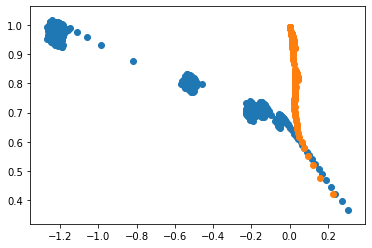

In [7]:
plt.scatter(P1,P2)
plt.scatter(P11,P12)

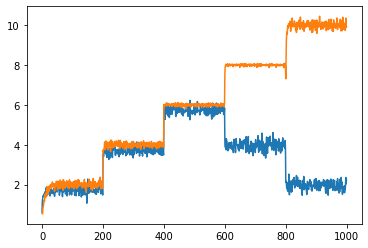

In [11]:
plt.plot(Y1)
plt.plot(Y)